In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10, 5]

   col1  col2  col3
0    18     4    -1
1    14    21     1
2    18    16    -1
3    12    21     1
4     3     4     1
5    19     2    -1
6     3    14     1
7     4     2    -1


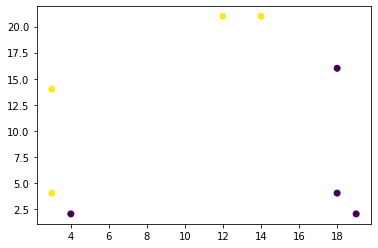

In [3]:
x = np.random.choice(25,8)
y = np.random.choice(25,8)
x_y = np.arange(25)

label = []
for i in range(len(y)):
    if y[i] >= x_y[x[i]]:   #label coordinates 1 if the data point lies 
        label.append(1)     #above the line y=x, and 0 otherwise. 
    else:
        label.append(-1)

data = pd.DataFrame({'col1': x, 'col2':y, 'col3':label})
print(data)

plt.scatter(data=data, x = 'col1', y = 'col2', c = label)

$X$ = $[(18,4),(14,21),(18,16),(12,21),(3,4),(19,2),(3,14),(4,2)]^{T}$ \
$y$ = $[-1,1,-1,1,1,-1,1,-1]$

In [227]:
X = data[['col1', 'col2']].to_numpy()
y = label
type(X[0])

numpy.ndarray

In [ ]:
def weights(label, X, weights):
    #Get weights for given label, coordinates, and initial weights
    #args:
    #    Label: int -> (-1 or 1) for this use case
    #    X: numpy.ndarray -> (x,y)-coordinates 
    #    weights: numpy.ndarray -> vector of weights
        
    c = label*np.dot(weights,np.append(X,1))
    if c <= 0:
        return weights + np.dot(label,np.append(X,1))
    else:
        return weights

In [225]:
#Get weights associated with randomly-generated data and labes, as above, with 
#initial weights = (0,0,0)

w = np.array([0,0,0])
ws = []
for i in range(len(y)):
    w = weights(y[i], X[i], w)
    ws.append(w)
ws  #weights

[array([-18,  -4,  -1]),
 array([-4, 17,  0]),
 array([-22,   1,  -1]),
 array([-10,  22,   0]),
 array([-10,  22,   0]),
 array([-10,  22,   0]),
 array([-10,  22,   0]),
 array([-14,  20,  -1])]

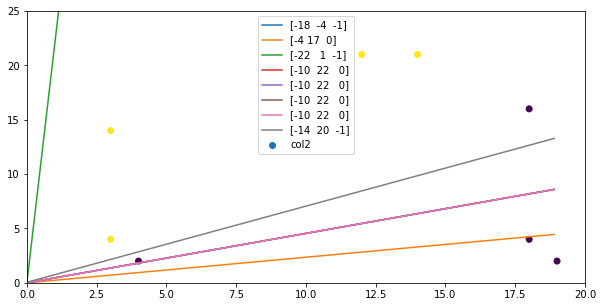

In [226]:
#Plot each of the weights as a line 

plt.axis([0,20,0,25])
plt.scatter(data=data, x = 'col1', y = 'col2', c = label)
for i in range(len(ws)):
    x1 = np.arange(max(data['col1']), step = 0.1)
    x2 = []
    for j in range(len(x1)):
        x2.append((-ws[i][0]/ws[i][1])*x1[j] + (-ws[i][2]/ws[7][1]))
    plt.plot(x1, x2, label = ws[i])
plt.legend()
